In [ ]:
PROBLEM STATEMENT

Brain tumors are life-threatening abnormalities that require early and accurate diagnosis for effective treatment planning. Manual interpretation of MRI scans by radiologists can be time-consuming and subject to human error, especially when distinguishing between different tumor types. Therefore, there is a need for an automated and reliable system that can assist in accurate tumor classification.

The objective of this project is to develop a Deep Learning-based Convolutional Neural Network (CNN) model to classify brain MRI images into four categories: Glioma, Meningioma, Pituitary tumor, and No Tumour**. The model will automatically extract important spatial and structural features from MRI images and perform multi-class classification. In addition to predicting the tumor type, the system will also provide the confidence percentage (softmax probability score)** for each prediction, helping medical professionals understand the certainty of the model’s decision.

This system aims to improve diagnostic efficiency, reduce human error, and support early detection through AI-driven medical image analysis.



In [16]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img, img_to_array
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

In [17]:
DATASET_PATH=r"C:\Users\USER\Desktop\APARNA\aparna project brain tumour\data image"

In [18]:
train_datagen = ImageDataGenerator(
    rescale=1./255, 
    rotation_range=20, 
    width_shift_range=0.2, 
    height_shift_range=0.2, 
    shear_range=0.2, 
    zoom_range=0.2, 
    horizontal_flip=True, 
    validation_split=0.2  
)
train_generator = train_datagen.flow_from_directory(
    DATASET_PATH + "\\Training",
    target_size=(150, 150),
    batch_size=32,
    class_mode='categorical',
    subset='training'
)
val_generator = train_datagen.flow_from_directory(
    DATASET_PATH + "\\Training",
    target_size=(150, 150),
    batch_size=32,
    class_mode='categorical',
    subset='validation'
)
test_datagen = ImageDataGenerator(rescale=1./255)
test_generator = test_datagen.flow_from_directory(
    DATASET_PATH + "\\Testing",
    target_size=(150, 150),
    batch_size=32,
    class_mode='categorical'
)


Found 5143 images belonging to 4 classes.
Found 569 images belonging to 4 classes.
Found 1311 images belonging to 4 classes.


In [44]:
model = Sequential([

    Conv2D(32,(3,3),activation='relu', padding='same', input_shape=(150,150,3)),
    MaxPooling2D(2,2),

    Conv2D(64,(3,3), activation='relu', padding='same'),
    MaxPooling2D(2,2),

    Conv2D(128,(3,3),activation='relu', padding='same'),
    MaxPooling2D(2,2),

    Conv2D(256,(3,3),activation="relu", padding='same'),
    MaxPooling2D(2,2),

    Conv2D(512,(3,3),activation="relu", padding='same'),
    MaxPooling2D(2,2),

    Flatten(),
    Dense(512,activation='relu'),
    Dense(256,activation='relu'), 
    Dense(128,activation='relu'), 
    Dropout(0.5),#SHOULD BE KEPT BEFORE
    Dense(4,activation='softmax')
])

model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

In [45]:
model.fit(train_generator, validation_data=val_generator, epochs=30)

Epoch 1/30
161/161 ━━━━━━━━━━━━━━━━━━━━ 103s 626ms/step - accuracy: 0.4462 - loss: 1.1315 - val_accuracy: 0.5255 - val_loss: 1.0876
Epoch 2/30
161/161 ━━━━━━━━━━━━━━━━━━━━ 101s 625ms/step - accuracy: 0.5930 - loss: 0.9316 - val_accuracy: 0.5518 - val_loss: 1.1080
Epoch 3/30
161/161 ━━━━━━━━━━━━━━━━━━━━ 100s 618ms/step - accuracy: 0.6996 - loss: 0.7624 - val_accuracy: 0.7153 - val_loss: 0.7775
Epoch 4/30
161/161 ━━━━━━━━━━━━━━━━━━━━ 100s 619ms/step - accuracy: 0.7496 - loss: 0.6686 - val_accuracy: 0.7452 - val_loss: 0.6873
Epoch 5/30
161/161 ━━━━━━━━━━━━━━━━━━━━ 100s 620ms/step - accuracy: 0.7935 - loss: 0.5594 - val_accuracy: 0.7663 - val_loss: 0.6874
Epoch 6/30
161/161 ━━━━━━━━━━━━━━━━━━━━ 100s 618ms/step - accuracy: 0.8196 - loss: 0.5073 - val_accuracy: 0.7768 - val_loss: 0.6587
Epoch 7/30
161/161 ━━━━━━━━━━━━━━━━━━━━ 102s 633ms/step - accuracy: 0.8409 - loss: 0.4377 - val_accuracy: 0.8032 - val_loss: 0.6413
Epoch 8/30
161/161 ━━━━━━━━━━━━━━━━━━━━ 100s 621ms/step - accuracy: 0.8584 -

In [47]:
img_path = r"C:\Users\USER\Desktop\APARNA\aparna project brain tumour\data image\meningloma.jpg"

In [48]:
class_labels = ["Glioma", "Meningioma", "No Tumour", "Pituitary"]


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 218ms/step

Predicted Class:Glioma
Confidence:53.18%


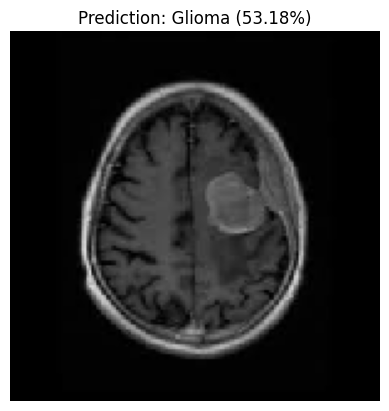

In [49]:
img = load_img(img_path, target_size=(150, 150))
img_array = img_to_array(img)
img_array = np.expand_dims(img_array,axis=0)
img_array = img_array / 255.0
# Predict
prediction = model.predict(img_array)
predicted_index = np.argmax(prediction, axis=1)[0]
predicted_label = class_labels[predicted_index]
confidence = np.max(prediction)*100
print(f"\nPredicted Class:{predicted_label}")
print(f"Confidence:{confidence:.2f}%")


plt.imshow(img)
plt.title(f"Prediction: {predicted_label} ({confidence:.2f}%)")
plt.axis("off")
plt.show()

CONCLUSION

This project successfully developed a Deep Learning–based Convolutional Neural Network (CNN) model for multi-class brain tumor classification using MRI images. The model was trained with data augmentation techniques such as rotation, shifting, zooming, and horizontal flipping to improve generalization and reduce overfitting. The CNN architecture consisted of multiple convolutional and max-pooling layers for automatic feature extraction, followed by fully connected dense layers with dropout regularization to enhance classification performance.

The model was capable of classifying MRI scans into four categories: Glioma, Meningioma, Pituitary tumor, and No Tumour**. The final output layer used a softmax activation function**, which not only predicted the tumor class but also provided a confidence percentage score for each prediction. This confidence value indicates the probability of correctness, thereby increasing the interpretability and reliability of the system.

After training for 30 epochs, the model achieved strong accuracy on both training and validation datasets, demonstrating its ability to effectively distinguish between different tumor types. The system successfully predicted the tumor category for test images and displayed the corresponding confidence level.

Overall, the developed CNN model provides an automated, accurate, and efficient tool for brain tumor classification. It can assist radiologists in early detection, reduce manual diagnostic effort, and support medical decision-making through AI-driven analysis.
